## Simple Linear Regression - One feature (x) & One Target (y)

To ignore any default warning from Python compiler


In [195]:
import warnings
warnings.filterwarnings('ignore')

Import all required libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

Read and Load Data

In [14]:
df = pd.read_csv('.\..\csv\emp_data.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Basic validation Check

In [22]:
df.shape
df.isnull().sum()
df.isna().sum()
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Statistics Information

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


# Interpretation
1. There are no null values
2. There are no duplicate values
3. All features are of Number type
4. Only one x and y are available

Exploratory Data Analysis

In [49]:
# Avg salary based on year of exp
df.groupby('YearsExperience').agg({'Salary': 'mean'})

,Salary
YearsExperience,
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
2.9,56642.0
3.0,60150.0
3.2,59445.0
3.7,57189.0


In [50]:
# Empolyees earning more 60000 & who have more then 5 years of experience
df[(df['YearsExperience']>=5) & (df['Salary'] >= 60000)]

,YearsExperience,Salary
16,5.1,66029.0
17,5.3,83088.0
18,5.9,81363.0
19,6.0,93940.0
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0


In [55]:
# Employees earning between 50000 - 80000
df[ ( df['Salary'] > 50000 ) & (df['Salary'] < 80000) ]

,YearsExperience,Salary
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
10,3.9,63218.0
11,4.0,55794.0
12,4.0,56957.0
13,4.1,57081.0
14,4.5,61111.0


In [100]:
# Avg salary based on bins
df.groupby('YearsExperience').agg({'Salary': 'mean'})
sal_bin = {'bin': {0:'1-2',1:'2-4',2:'4-6',3:'6-8',4:'8-10'},
          'sal': {0:0,1:0,2:0,3:0,4:0},
           'cnt':{0:0,1:0,2:0,3:0,4:0},}
for i,r in df.iterrows():
    if (r['YearsExperience'] >= 1 ) & (r['YearsExperience'] <= 2):
        sal_bin['sal'][0] += r['Salary']
        sal_bin['cnt'][0] += 1
    elif (r['YearsExperience'] > 2 ) & (r['YearsExperience'] <= 4):
        sal_bin['sal'][1] += r['Salary']
        sal_bin['cnt'][1] += 1
    elif (r['YearsExperience'] > 4 ) & (r['YearsExperience'] <= 6):
        sal_bin['sal'][2] += r['Salary']
        sal_bin['cnt'][2] += 1
    elif (r['YearsExperience'] > 6 ) & (r['YearsExperience'] <= 8):
        sal_bin['sal'][3] += r['Salary']
        sal_bin['cnt'][3] += 1
    elif (r['YearsExperience'] > 8 ) & (r['YearsExperience'] <= 10):
        sal_bin['sal'][4] += r['Salary']           
        sal_bin['cnt'][4] += 1
df_sal_bin  = pd.DataFrame(data= sal_bin, index=[0,1,2,3,4])
df_sal_bin['avg_salary'] = df_sal_bin['sal']/df_sal_bin['cnt']
df_sal_bin

,bin,sal,cnt,avg_salary
0,1-2,166804.0,4,41701.000000
1,2-4,508731.0,9,56525.666667
2,4-6,510550.0,7,72935.714286
3,6-8,291313.0,3,97104.333333
4,8-10,558429.0,5,111685.800000


Now Plot in Graph you can see perfect linear line

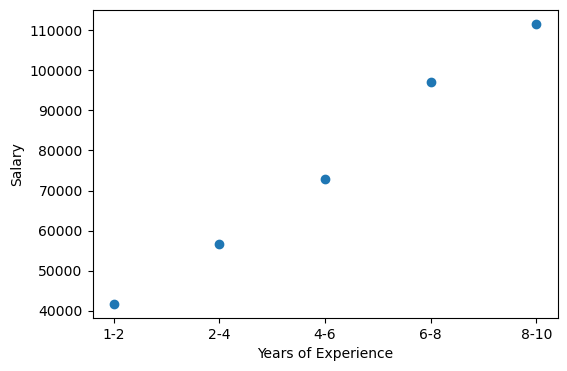

In [112]:
plt.figure(figsize=(6,4))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x=df_sal_bin['bin'],y=df_sal_bin['avg_salary'])

Check Correlation between Years of experience and Salary

<Axes: xlabel='YearsExperience', ylabel='Salary'>

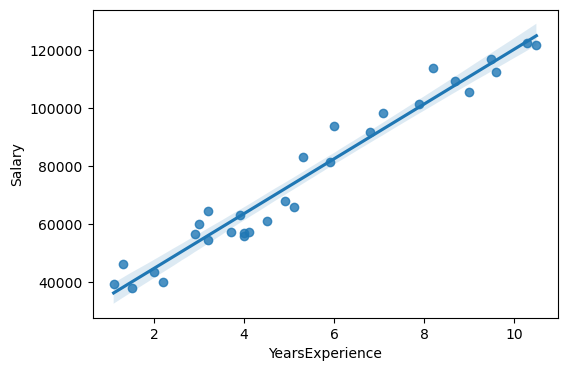

In [111]:
plt.figure(figsize=(6,4))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

Check for outliers in feature Years of Experience, although not required just to get the visual representation

<Axes: >

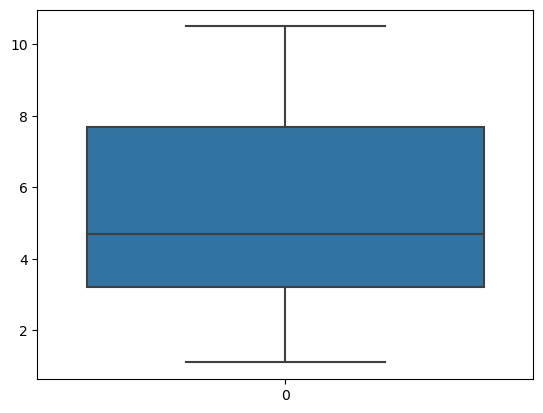

In [132]:
sns.boxplot(data=df['YearsExperience'])

<Axes: >

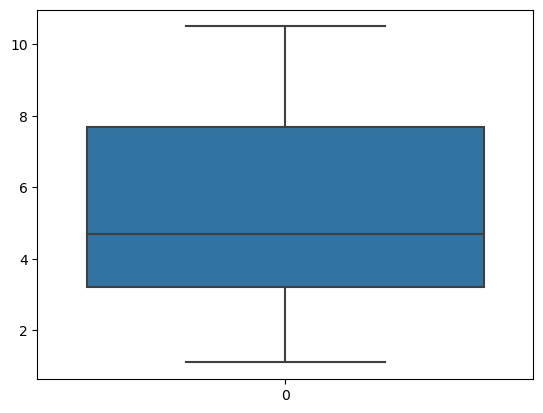

In [133]:
sns.boxplot(data=df['YearsExperience'])

Plot the distribution of the Salary (y) variable

<Axes: xlabel='Salary', ylabel='Count'>

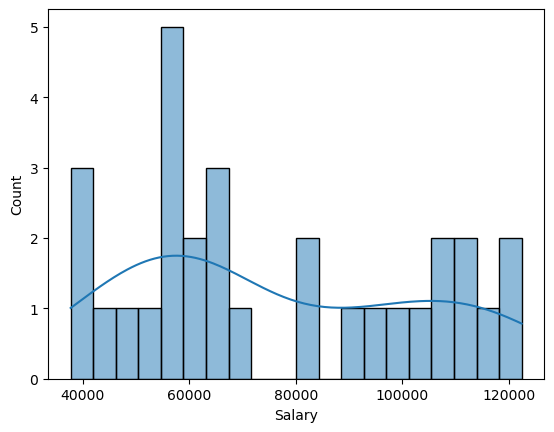

In [134]:
sns.histplot(x=df['Salary'],kde=True,bins=20)

As Salary is 1000's better to scale both x and y to fit the model

In [170]:
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(df)
df = pd.DataFrame(scaled_data,columns=df.columns)
df.head(5)

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


Build the Linear Regression Model

In [178]:
x = np.array(df['YearsExperience']).reshape(-1,1)
y = np.array(df['Salary']).reshape(-1,1)
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [179]:
y_pred = lr_model.predict(X_test)
print(f"Best fit line: {lr_model.coef_} x + {lr_model.intercept_}")

Best fit line: [[1.04805697]] x + [-0.01514983]


Draw the best fit line on the training data

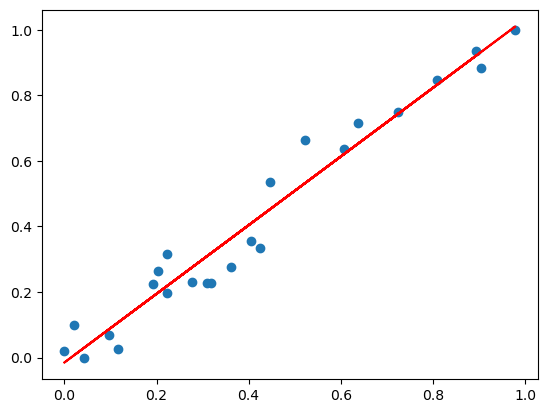

In [193]:
plt.scatter(X_train,y_train)
plt.plot(X_train, lr_model.coef_ * X_train + lr_model.intercept_,c='r')

Draw best fit line for testing data

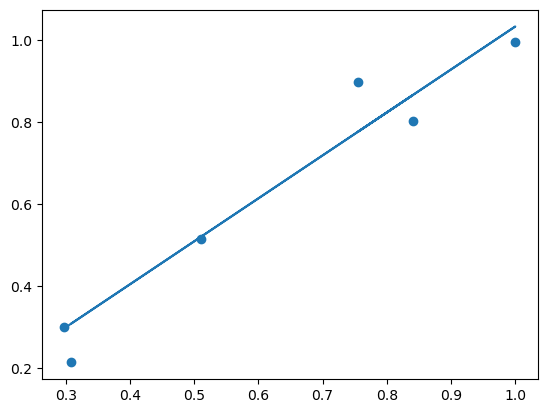

In [192]:
plt.scatter(X_test,y_test)
plt.plot(X_test,lr_model.coef_ * X_test + lr_model.intercept_)

Scores

In [180]:
lr_r2_score = r2_score(y_test,y_pred)
lr_mean_sq_err =  mean_squared_error(y_test,y_pred)
print('Explained Variance :',lr_r2_score)
print('Unexplained Variance :',1-lr_r2_score)
print('Residual :',lr_mean_sq_err)

Explained Variance : 0.9439628569611375
Unexplained Variance : 0.056037143038862536
Residual : 0.004934873835015113


Map the actual and predicted

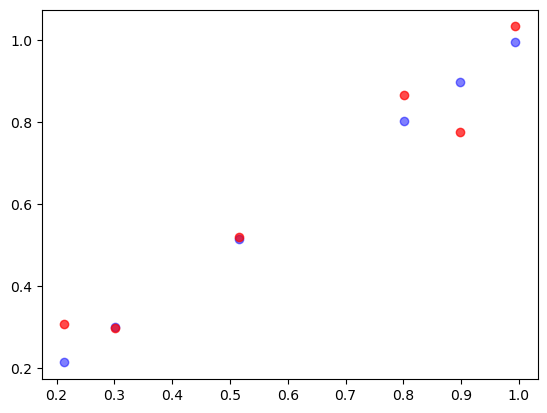

In [189]:
plt.scatter(x=y_test,y=y_test,c='blue',label = 'Actual',alpha=0.5)
plt.scatter(x=y_test,y=y_pred,c='red',label='Predicted',alpha=0.7)